In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [57]:
df = pd.read_csv('/content/PJME_hourly.csv')
df= df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

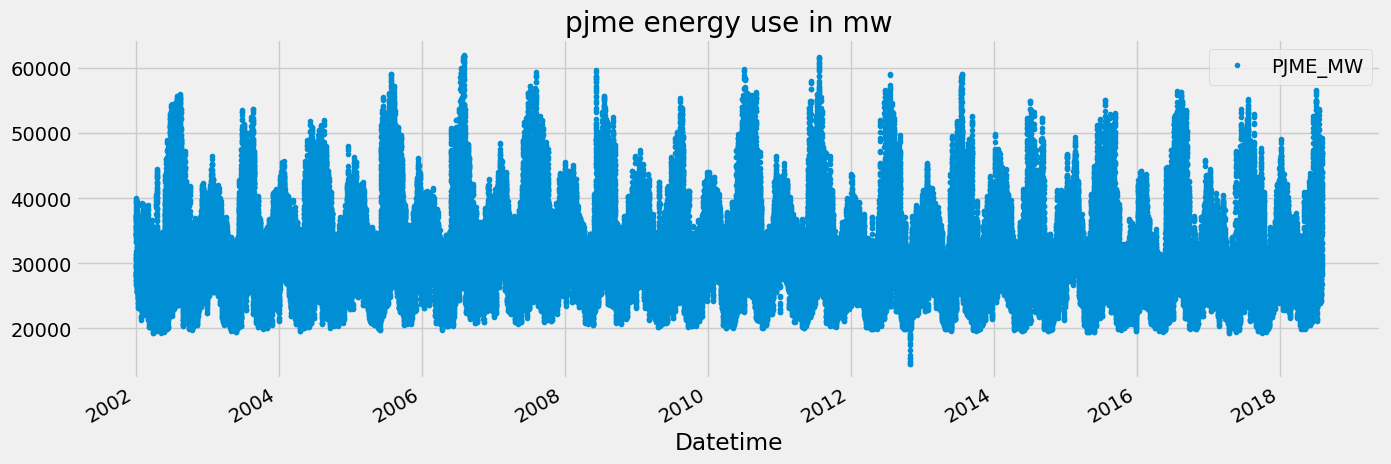

In [46]:
df.plot(style='.',figsize=(15,5),color=color_pal[0],title='pjme energy use in mw')
plt.show()

Train / test split

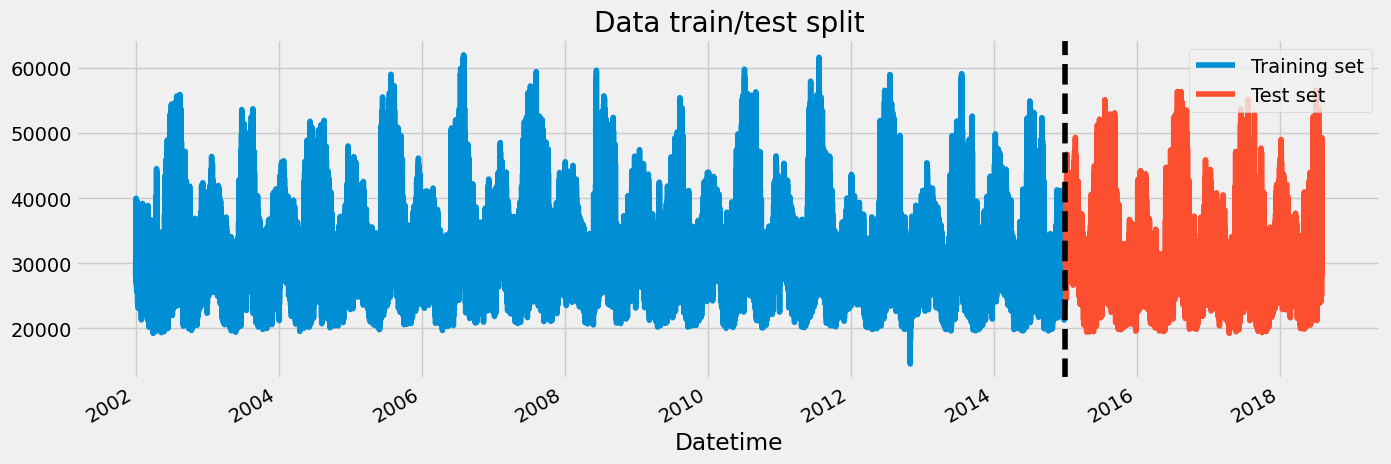

In [47]:

train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

fig, ax =plt.subplots(figsize=(15,5))
train.plot(ax=ax,label='Training set',title = 'Data train/test split')
test.plot(ax=ax,label= 'TEST set')
ax.axvline('01-01-2015',color='black',ls='--')
ax.legend(['Training set','Test set'])
plt.show()

In [59]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

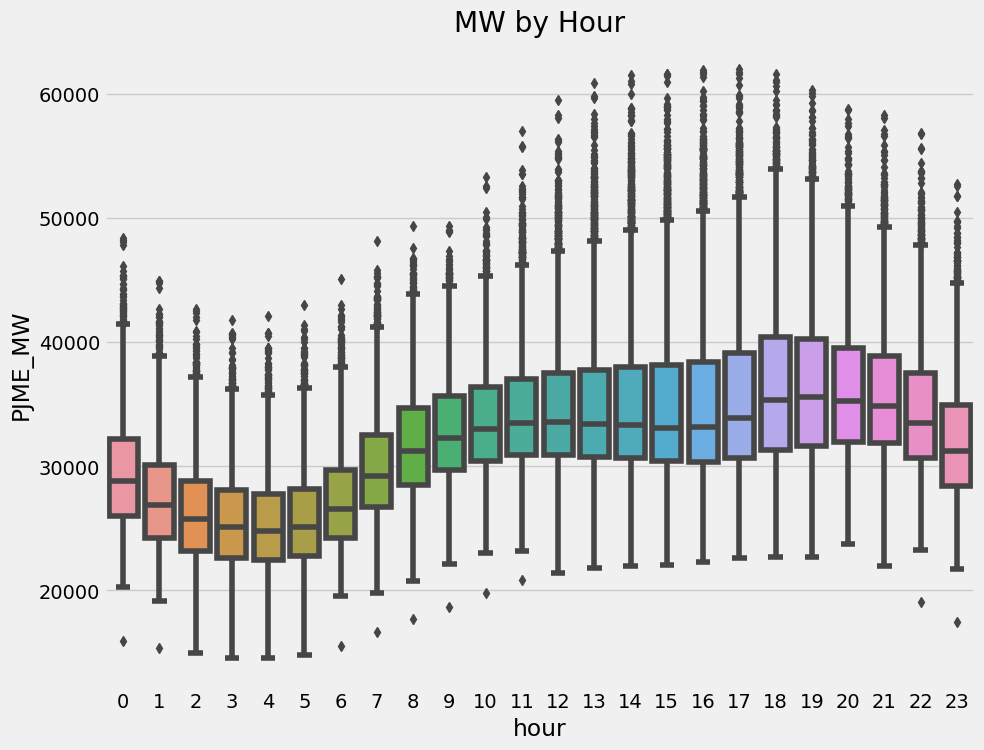

In [60]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='PJME_MW')
ax.set_title('MW by Hour')
plt.show()

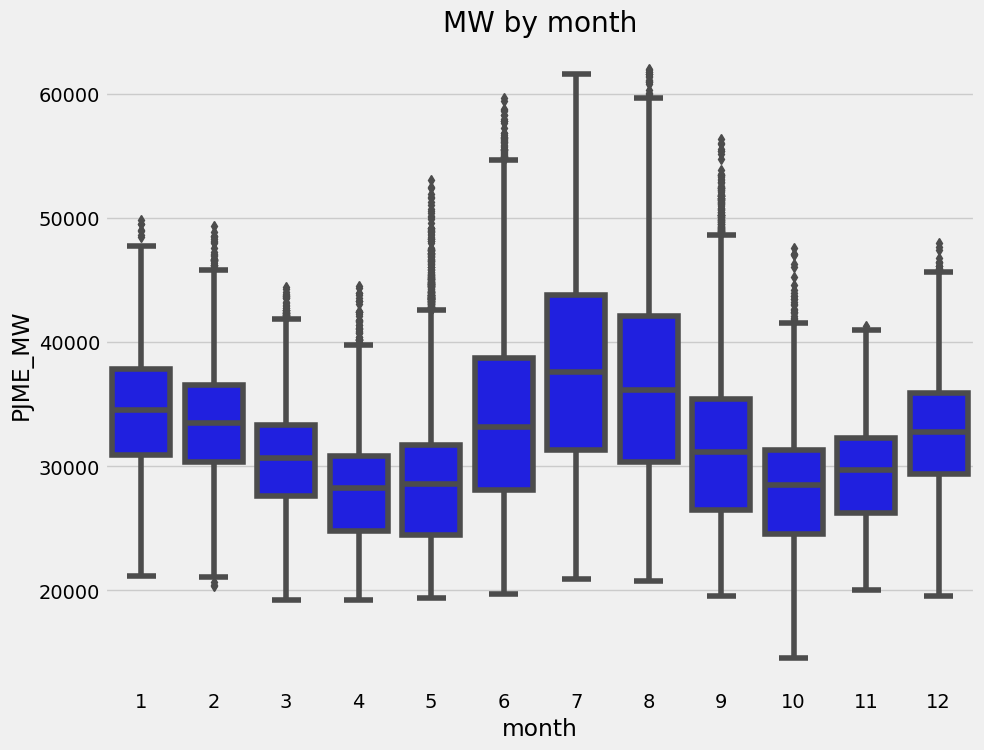

In [63]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='PJME_MW',color = 'blue')
ax.set_title('MW by month')
plt.show()